# Best/worst comparison

## Import

In [1]:
from numpy import *
from matplotlib import pyplot as plt

# Matlab colors RGB
#blue (0,0.4470,0.7410)
#orange (0.8500,0.3250,0.0980)
#yellow (0.9290,0.6940,0.1250)
#purple (0.4940,0.1840,0.5560)

## Help functions

In [2]:
def normalized_mse(pred, true):
    # true (nSamples x nJoints)
    # pred (nSamples x nJoints)
    #return error_joints, error_avg
    
    # Normalizing with variance
    nSamples = size(true,axis=0);
    sigma = var(true,axis=0);
    
    # Calculating each error value
    es = abs(true-pred)**2
    s = sum(es,axis=0)
    error_joints = s/(nSamples*sigma) # Mean error of each joint
    error_avg = mean(error_joints,axis=0); # Combined joint error
    
    return error_joints, error_avg

## Load data

In [3]:
nInputs = 21
nOutputs = 7

data = genfromtxt('SimulinkData_PickUp.csv', delimiter=',')
true = data[:,nInputs:,newaxis]

LSTMres = load('LSTM_prediction.npy')
PCESNres = load('PCESN_prediction.npy')

## Plot

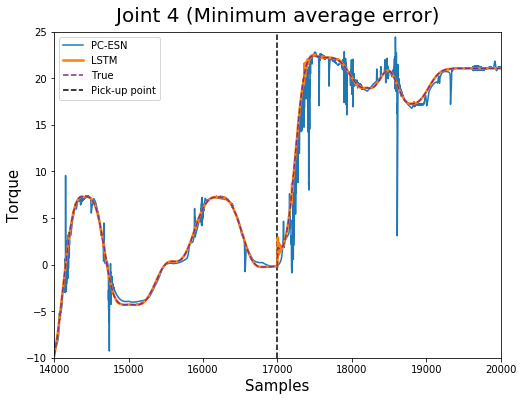

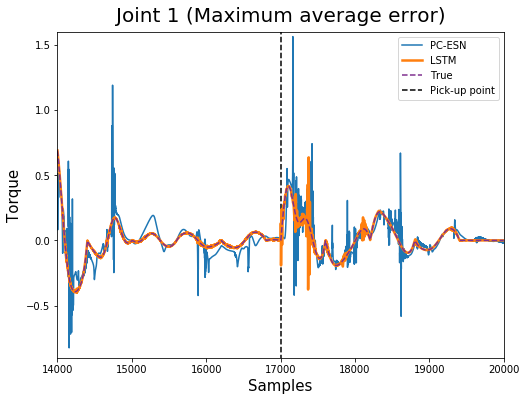

In [46]:
title_font = {'size':'20','verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'size':'15'}

start = 14000
stop = 20000
    
error_joints, _ = normalized_mse(PCESNres[:,start:,0].T, true[start:,:,0])
mini = argmin(error_joints)
maxi = argmax(error_joints)

# Minimum error
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(1,1,1)
plt.plot(PCESNres[mini,start:stop,0],label='PC-ESN')
plt.plot(LSTMres[start:stop,0,mini],linewidth=2.5,label='LSTM')
plt.plot(true[start:stop,mini],linestyle='dashed',color=(0.4940,0.1840,0.5560),label='True')
plt.vlines(3001, -10, 25, colors='k', linestyles='dashed',label='Pick-up point')
plt.ylim(-10,25)
plt.xlim(0,6000)
ax1.set_xticklabels(range(start,stop+1000,1000))
plt.legend(loc='upper left',ncol=1)
plt.title('Joint {} (Minimum average error)'.format(mini+1),**title_font)
plt.xlabel('Samples',**axis_font)
plt.ylabel('Torque',**axis_font)
fig1.savefig('Min.png', dpi=300)

# Maximum error
fig2=plt.figure(figsize=(8,6))
ax2 = fig2.add_subplot(1,1,1)
plt.plot(PCESNres[maxi,start:stop,0],label='PC-ESN')
plt.plot(LSTMres[start:stop,0,maxi],linewidth=2.5,label='LSTM')
plt.plot(true[start:stop,maxi],linestyle='dashed',color=(0.4940,0.1840,0.5560),label='True')
plt.vlines(3001, -5, 25, colors='k', linestyles='dashed',label='Pick-up point')
plt.ylim(-0.9,1.6)
plt.xlim(0,6000)
ax2.set_xticklabels(range(start,stop+1000,1000))
plt.legend(loc='upper right',ncol=1)
plt.title('Joint {} (Maximum average error)'.format(maxi+1),**title_font)
plt.xlabel('Samples',**axis_font)
plt.ylabel('Torque',**axis_font)
fig2.savefig('Max.png', dpi=300)
